### Logistic Regression(Classification)
  - Binary Classification, Multi Label(Class) Classification
  - Data set 설정
  - matplotlib을 이용하여 데이터셋 분포 그래프 표시

2.1.0
Iter: 0, Loss: 0.6874
Iter: 10, Loss: 0.6507
Iter: 20, Loss: 0.6331
Iter: 30, Loss: 0.6223
Iter: 40, Loss: 0.6140
Iter: 50, Loss: 0.6069
Iter: 60, Loss: 0.6004
Iter: 70, Loss: 0.5943
Iter: 80, Loss: 0.5884
Iter: 90, Loss: 0.5829
Iter: 100, Loss: 0.5776
Iter: 110, Loss: 0.5725
Iter: 120, Loss: 0.5676
Iter: 130, Loss: 0.5629
Iter: 140, Loss: 0.5584
Iter: 150, Loss: 0.5541
Iter: 160, Loss: 0.5499
Iter: 170, Loss: 0.5459
Iter: 180, Loss: 0.5421
Iter: 190, Loss: 0.5384
Iter: 200, Loss: 0.5349
Iter: 210, Loss: 0.5314
Iter: 220, Loss: 0.5281
Iter: 230, Loss: 0.5249
Iter: 240, Loss: 0.5219
Iter: 250, Loss: 0.5189
Iter: 260, Loss: 0.5160
Iter: 270, Loss: 0.5132
Iter: 280, Loss: 0.5105
Iter: 290, Loss: 0.5079
Iter: 300, Loss: 0.5054
Iter: 310, Loss: 0.5030
Iter: 320, Loss: 0.5006
Iter: 330, Loss: 0.4983
Iter: 340, Loss: 0.4960
Iter: 350, Loss: 0.4939
Iter: 360, Loss: 0.4917
Iter: 370, Loss: 0.4897
Iter: 380, Loss: 0.4877
Iter: 390, Loss: 0.4857
Iter: 400, Loss: 0.4838
Iter: 410, Loss: 0.48

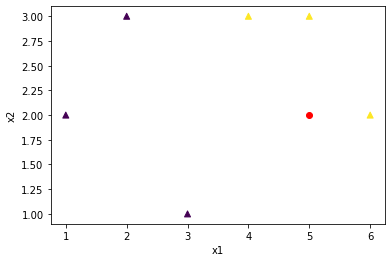

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
epoch = 1001

def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

def loss_function(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_function(logistic_regression(features), features, labels)
        return tape.gradient(loss_value, [W, b])

for step in range(epoch):
    for features, labels in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        if step % 10 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_function(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))
